In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
df['overweight'] = (df['weight']/((df['height']/100)**2) > 25).astype(int)

In [5]:
df[['cholesterol', 'gluc']] = (df[['cholesterol', 'gluc']]).replace(1, 0)  
df[['cholesterol', 'gluc']] = (df[['cholesterol', 'gluc']]).replace(2, 1)  
df[['cholesterol', 'gluc']] = (df[['cholesterol', 'gluc']]).replace(3, 1)  
df = df.replace([0],'good')
df = df.replace([1],'bad')

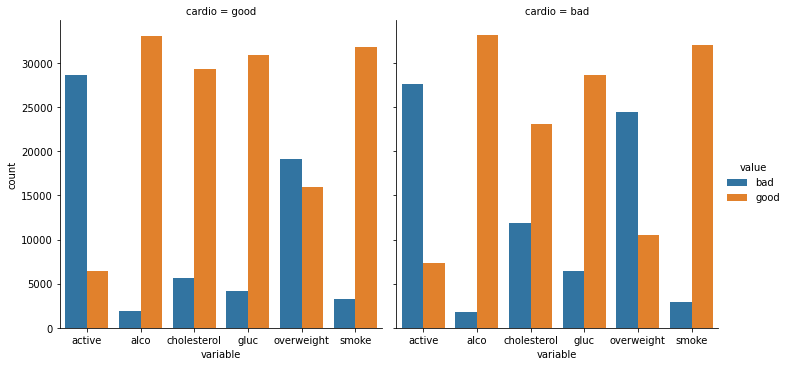

In [6]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")
df_cat = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

In [7]:
df = pd.read_csv('medical_examination.csv')

In [8]:
df['ap_lo'].astype(str).astype(int)

0         80
1         90
2         70
3        100
4         60
        ... 
69995     80
69996     90
69997     90
69998     80
69999     80
Name: ap_lo, Length: 70000, dtype: int32

In [9]:
df['ap_hi'].astype(str).astype(int)

0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int32

In [10]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

<AxesSubplot:>

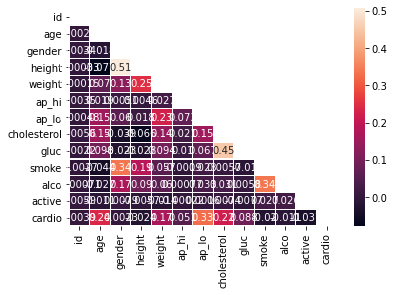

In [11]:
mask = np.triu(np.ones_like(df_heat.corr()))
sns.heatmap(df_heat.corr(),  annot = True, linewidths=.1, mask=mask)